In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dir = 'round_3_2025/'

def simple_mid_price(row):
    bid = row[3]
    ask = row[9]
    if np.isnan(bid):
        bid = 0
    elif np.isnan(ask):
        ask = 0
    return (bid+ask) / 2

prices_1_0 = pd.read_csv(dir+"prices_round_3_day_0.csv", delimiter=';')
prices_1_1 = pd.read_csv(dir+"prices_round_3_day_1.csv", delimiter=';')
prices_1_1['timestamp'] += 1000000 # shift day 2 to 0-24h
prices_1_2 = pd.read_csv(dir+"prices_round_3_day_2.csv", delimiter=';')
prices_1_2['timestamp'] += 2000000 # shift day 2 to 0-24h

prices = pd.concat([prices_1_0, prices_1_1, prices_1_2])
prices['mid_price'] = prices.apply(simple_mid_price, axis=1)

prices = pd.concat([prices_1_0, prices_1_1, prices_1_2])

/var/folders/rw/6s9g6sx16_5dcr8x1yp7p2jw0000gn/T/ipykernel_20339/1774657670.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bid = row[3]
/var/folders/rw/6s9g6sx16_5dcr8x1yp7p2jw0000gn/T/ipykernel_20339/1774657670.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ask = row[9]


In [3]:
prices['product'].unique()

array(['VOLCANIC_ROCK_VOUCHER_10500', 'DJEMBES', 'CROISSANTS', 'JAMS',
       'VOLCANIC_ROCK_VOUCHER_10000', 'KELP',
       'VOLCANIC_ROCK_VOUCHER_9750', 'PICNIC_BASKET1', 'PICNIC_BASKET2',
       'VOLCANIC_ROCK_VOUCHER_9500', 'RAINFOREST_RESIN',
       'VOLCANIC_ROCK_VOUCHER_10250', 'SQUID_INK', 'VOLCANIC_ROCK'],
      dtype=object)

In [4]:

day_1 = prices[prices['day'] == 1]
df = day_1[day_1['product']=='VOLCANIC_ROCK_VOUCHER_10000']

underlying_prices = day_1[day_1['product']=='VOLCANIC_ROCK']['mid_price'].values

df['underlying'] = underlying_prices
df['time_to_expiry'] = 7/365 - df['timestamp'] / (365e6) # timestamps per year

df[['mid_price', 'time_to_expiry', 'underlying']]


/var/folders/rw/6s9g6sx16_5dcr8x1yp7p2jw0000gn/T/ipykernel_20339/1461459803.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['underlying'] = underlying_prices
/var/folders/rw/6s9g6sx16_5dcr8x1yp7p2jw0000gn/T/ipykernel_20339/1461459803.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_to_expiry'] = 7/365 - df['timestamp'] / (365e6) # timestamps per year


,mid_price,time_to_expiry,underlying
12,517.5,0.016438,10516.0
18,516.5,0.016438,10515.0
39,516.5,0.016438,10515.0
53,519.5,0.016438,10517.0
64,521.5,0.016437,10519.5
...,...,...,...
139940,237.5,0.013700,10224.5
139948,237.5,0.013700,10225.5
139970,234.5,0.013699,10222.0
139977,237.5,0.013699,10223.5


In [5]:
# 1e6 timestamps/day
# 365 days/year
# 1e6*365 = 365e6 timestamps/year

In [6]:
voucher_df['time_to_expiry']

NameError: name 'voucher_df' is not defined

In [ ]:
(8e6 - voucher_df['timestamp'])

0         8000000.0
1         8000000.0
2         8000000.0
3         8000000.0
4         8000000.0
            ...    
149995    5000100.0
149996    5000100.0
149997    5000100.0
149998    5000100.0
149999    5000100.0
Name: timestamp, Length: 150000, dtype: float64

In [12]:
vouchers = ['VOLCANIC_ROCK_VOUCHER_10500', 'VOLCANIC_ROCK_VOUCHER_10000', 
            'VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_9500',
            'VOLCANIC_ROCK_VOUCHER_10250']


voucher_df = prices[prices['product'].isin(vouchers)]
voucher_df.reset_index(drop=True, inplace=True)

# each round has 1 mil stamps
start_time = 1000000 * 8 # starting at day 0, expires on day 8

voucher_df['strike_price'] = voucher_df['product'].apply(lambda x: int(x.split('_')[-1]))
voucher_df['strike_price'] = voucher_df['strike_price'].astype(int)
voucher_df['time_to_expiry'] = (start_time - voucher_df['timestamp']) / 365e6 # convert to years

spot_price = prices[prices['product'] == 'VOLCANIC_ROCK'][['mid_price', 'timestamp']]
spot_price.rename(columns={'mid_price': 'underlying_price'}, inplace=True)


voucher_df = pd.merge(voucher_df, spot_price, on='timestamp', how='left')

voucher_df = voucher_df[['timestamp', 'product', 'mid_price', 'strike_price', 'time_to_expiry', 'underlying_price']]
voucher_df.head(20)

/var/folders/rw/6s9g6sx16_5dcr8x1yp7p2jw0000gn/T/ipykernel_20339/1618201230.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voucher_df['strike_price'] = voucher_df['product'].apply(lambda x: int(x.split('_')[-1]))
/var/folders/rw/6s9g6sx16_5dcr8x1yp7p2jw0000gn/T/ipykernel_20339/1618201230.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voucher_df['strike_price'] = voucher_df['strike_price'].astype(int)
/var/folders/rw/6s9g6sx16_5dcr8x1yp7p2jw0000gn/T/ipykernel_20339/1618201230.py:14: SettingWithCo

,timestamp,product,mid_price,strike_price,time_to_expiry,underlying_price
0,0,VOLCANIC_ROCK_VOUCHER_10500,99.5,10500,0.021918,10503.0
1,0,VOLCANIC_ROCK_VOUCHER_10000,505.5,10000,0.021918,10503.0
2,0,VOLCANIC_ROCK_VOUCHER_9750,754.5,9750,0.021918,10503.0
3,0,VOLCANIC_ROCK_VOUCHER_9500,1003.5,9500,0.021918,10503.0
4,0,VOLCANIC_ROCK_VOUCHER_10250,273.5,10250,0.021918,10503.0
5,100,VOLCANIC_ROCK_VOUCHER_10000,515.5,10000,0.021918,10510.0
6,100,VOLCANIC_ROCK_VOUCHER_10250,279.5,10250,0.021918,10510.0
7,100,VOLCANIC_ROCK_VOUCHER_10500,102.5,10500,0.021918,10510.0
8,100,VOLCANIC_ROCK_VOUCHER_9750,761.5,9750,0.021918,10510.0
9,100,VOLCANIC_ROCK_VOUCHER_9500,1010.5,9500,0.021918,10510.0


# implied vol 

In [13]:
voucher_df['product'].unique()

array(['VOLCANIC_ROCK_VOUCHER_10500', 'VOLCANIC_ROCK_VOUCHER_10000',
       'VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_9500',
       'VOLCANIC_ROCK_VOUCHER_10250'], dtype=object)

In [14]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq

def black_scholes_call(spot, strike, time_to_expiry, volatility, r=0.0):
    d1 = (np.log(spot / strike) + (r + 0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    d2 = d1 - volatility * np.sqrt(time_to_expiry)
    call_price = (spot * norm.cdf(d1) - strike * np.exp(-r * time_to_expiry) * norm.cdf(d2))
    return call_price

def black_scholes_put(spot, strike, time_to_expiry, volatility, r=0.0):
    d1 = (np.log(spot / strike) + (r + 0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    d2 = d1 - volatility * np.sqrt(time_to_expiry)
    put_price = (strike * np.exp(-r * time_to_expiry) * norm.cdf(-d2) - spot * norm.cdf(-d1))
    return put_price

def delta(spot, strike, time_to_expiry, volatility):
    d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    return norm.cdf(d1)

def gamma(spot, strike, time_to_expiry, volatility):
    d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    return norm.pdf(d1)/(spot * volatility * np.sqrt(time_to_expiry))

def vega(spot, strike, time_to_expiry, volatility):
    d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    return norm.pdf(d1) * (spot * np.sqrt(time_to_expiry)) / 100

def theta(spot, strike, time_to_expiry, volatility, r=0.0):
    d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    d2 = d1 - volatility * np.sqrt(time_to_expiry)
    term1 = -(spot * norm.pdf(d1) * volatility) / (2 * np.sqrt(time_to_expiry))
    term2 = r * strike * np.exp(-r * time_to_expiry) * norm.cdf(d2)
    return term1 - term2

def implied_volatility(row, product, call_price, spot, strike, time_to_expiry, r=0.00):
    # Define the equation where the root is the implied volatility
    def equation(volatility):
        estimated_price = black_scholes_call(spot, strike, time_to_expiry, volatility, r)
        return estimated_price - call_price

    try:
        # Using Brent's method to find the root of the equation
        implied_vol = brentq(equation, 1e-10, 3.0, xtol=1e-10)
    except:
        print(row, product, 'very far out of the money, returning 0')
        return 0 # has no volatility because so far out of the money
    
    return implied_vol

def realized_vol(df, spot_col='underlying_price', window=1000):
    returns = np.log(df[spot_col] / df[spot_col].shift(1))
    rolling_std = returns.rolling(window=window).std() 
    timesteps_per_year = 365e6
    annualization_factor = np.sqrt(timesteps_per_year / window)
    df['realized_vol'] = rolling_std * annualization_factor
    return df


In [15]:
voucher_df['implied_vol'] = voucher_df.apply(lambda row: implied_volatility(row['timestamp'], row['product'], row['mid_price'], row['underlying_price'], row['strike_price'], row['time_to_expiry']), axis=1)
# save this so i don't have to recalculate it
voucher_df.to_csv("voucher_df_with_implied_vol.csv", index=False)

4200 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
12200 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
15800 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
41400 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
42000 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
72700 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
79400 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
80500 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
83100 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
90800 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
92400 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
109100 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
121100 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
131300 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, re

In [16]:
# load from csv
voucher_df = pd.read_csv("voucher_df_with_implied_vol.csv")

# calculate vega
voucher_df['vega'] = voucher_df.apply(lambda row: vega(row['underlying_price'], row['strike_price'], row['time_to_expiry'], row['implied_vol']), axis=1)
# calculate delta
voucher_df['delta'] = voucher_df.apply(lambda row: delta(row['underlying_price'], row['strike_price'], row['time_to_expiry'], row['implied_vol']), axis=1)
# calculate gamma
voucher_df['gamma'] = voucher_df.apply(lambda row: gamma(row['underlying_price'], row['strike_price'], row['time_to_expiry'], row['implied_vol']), axis=1)

voucher_df['realized_vol'] = voucher_df.apply(lambda row: realized_vol(prices[prices['timestamp'] <= row['timestamp']], spot_col='mid_price', window=500)['realized_vol'].iloc[-1], axis=1)

/var/folders/rw/6s9g6sx16_5dcr8x1yp7p2jw0000gn/T/ipykernel_20339/2572324753.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
/var/folders/rw/6s9g6sx16_5dcr8x1yp7p2jw0000gn/T/ipykernel_20339/2572324753.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
/var/folders/rw/6s9g6sx16_5dcr8x1yp7p2jw0000gn/T/ipykernel_20339/2572324753.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
/var/folders/rw/6s9g6sx16_5dcr8x1yp7p2jw0000gn/T/ipykernel_20339/2572324753.py:23: RuntimeWarning: invalid value encountered in scalar divide
  return norm.pdf(d1)/(spot * volatility * np.sqrt(time_to_e

KeyboardInterrupt: 

In [17]:
underlying_price = prices[prices['product'] == 'VOLCANIC_ROCK']['mid_price'].values

In [18]:
# load csv
vouchers_df = pd.read_csv("voucher_df_with_implied_vol.csv")

In [19]:
def fix_data(data):
    new_data = []
    prev_non_zero = None
    
    for j in range(0, len(data)):
        if data[j] < 2e-10:
            new_data.append(prev_non_zero)
        else:
            prev_non_zero = data[j]
            new_data.append(data[j])

    new_data = np.array(new_data)
    return new_data

Model coefficients:
a: 6.436691665593954
b: 0.09542230394668658
c: 0.15420737840135404
0         0.154235
1         0.175293
2         0.199969
3         0.236031
4         0.160484
            ...   
149995    0.157670
149996    0.153857
149997    0.157581
149998    0.170029
149999    0.192584
Name: fitted_iv, Length: 150000, dtype: float64


KeyError: 'fitted_iv'

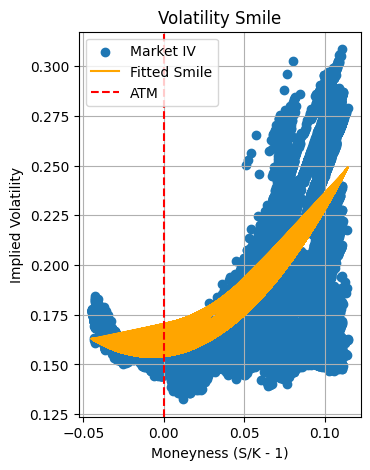

In [21]:
vouchers_df['Moneyness'] = vouchers_df['underlying_price'] / vouchers_df['strike_price'] - 1

X = vouchers_df['Moneyness'].values
Y = fix_data(vouchers_df['implied_vol'].values)

from sklearn.linear_model import LinearRegression
import numpy as np

X_fit = np.vstack([np.square(X), X, np.ones_like(X)]).T
model = LinearRegression().fit(X_fit, Y)
Y_fit = model.predict(X_fit)

print("Model coefficients:")
print("a:", model.coef_[0])
print("b:", model.coef_[1])
print("c:", model.intercept_)

# Plot the fit
plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
plt.scatter(X, Y, label='Market IV')
plt.plot(X, Y_fit, color='orange', label='Fitted Smile')
plt.axvline(0.0, color='red', linestyle='--', label='ATM')
plt.xlabel("Moneyness (S/K - 1)")
plt.ylabel("Implied Volatility")
plt.title(f"Volatility Smile")
plt.legend()
plt.grid(True)


vouchers_df['fitted_iv'] = Y_fit
print(vouchers_df['fitted_iv'])
vouchers_df['iv_diff'] = voucher_df['implied_vol'] - voucher_df['fitted_iv']

# Second subplot — IV Mispricing
plt.subplot(1, 2, 2)
plt.plot(voucher_df['iv_diff'])
plt.axhline(0, linestyle='--', color='black')
plt.axvline(0, linestyle='--', color='gray')
plt.xlabel("Time")
plt.ylabel("IV Mispricing (Market - Model)")
plt.title("IV Mispricing Signal")
plt.grid(True)
plt.xlim(0, 1000)

plt.tight_layout()
plt.show()

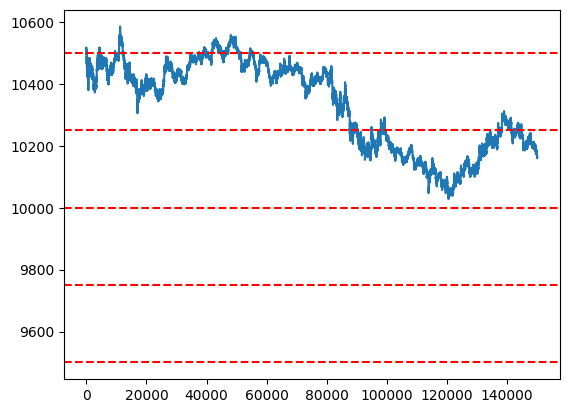

In [22]:
vouchers = ['VOLCANIC_ROCK_VOUCHER_10500',
            'VOLCANIC_ROCK_VOUCHER_10250',
            'VOLCANIC_ROCK_VOUCHER_10000',
            'VOLCANIC_ROCK_VOUCHER_9750',
            'VOLCANIC_ROCK_VOUCHER_9500']

underlying_prices = vouchers_df[vouchers_df['product'] == 'VOLCANIC_ROCK_VOUCHER_10500'][['underlying_price', 'timestamp']]
plt.plot(underlying_prices['underlying_price'])
plt.axhline(10500, color='red', linestyle='--')
plt.axhline(10250, color='red', linestyle='--')
plt.axhline(10000, color='red', linestyle='--')
plt.axhline(9750, color='red', linestyle='--')
plt.axhline(9500, color='red', linestyle='--')

In [23]:
underlying_prices['underlying_price']

returns = np.log(underlying_prices['underlying_price'] / underlying_prices['underlying_price'].shift(1))
rv_std = returns.std()

hard_coded_rv = rv_std * np.sqrt(365 * 10000)
hard_coded_rv 

np.float64(0.47819602665563404)

In [24]:
def realized_vol(df, spot_col='underlying_price', window=1000):
    returns = np.log(df[spot_col] / df[spot_col].shift(1))
    rolling_std = returns.rolling(window=window).std() 
    timesteps_per_year = 3.65e6 / 2
    print(rolling_std.mean())
    annualization_factor = np.sqrt(timesteps_per_year)
    df['realized_vol'] = rolling_std * annualization_factor
    return df

In [25]:
from math import log, sqrt, exp
from statistics import NormalDist

class BlackScholes:
    @staticmethod
    def black_scholes_call(spot, strike, time_to_expiry, volatility):
        d1 = (
            log(spot) - log(strike) + (0.5 * volatility * volatility) * time_to_expiry
        ) / (volatility * sqrt(time_to_expiry))
        d2 = d1 - volatility * sqrt(time_to_expiry)
        call_price = spot * NormalDist().cdf(d1) - strike * NormalDist().cdf(d2)
        return call_price

    @staticmethod
    def black_scholes_put(spot, strike, time_to_expiry, volatility):
        d1 = (log(spot / strike) + (0.5 * volatility * volatility) * time_to_expiry) / (
            volatility * sqrt(time_to_expiry)
        )
        d2 = d1 - volatility * sqrt(time_to_expiry)
        put_price = strike * NormalDist().cdf(-d2) - spot * NormalDist().cdf(-d1)
        return put_price

    @staticmethod
    def delta(spot, strike, time_to_expiry, volatility):
        d1 = (
            log(spot) - log(strike) + (0.5 * volatility * volatility) * time_to_expiry
        ) / (volatility * sqrt(time_to_expiry))
        return NormalDist().cdf(d1)

    @staticmethod
    def gamma(spot, strike, time_to_expiry, volatility):
        d1 = (
            log(spot) - log(strike) + (0.5 * volatility * volatility) * time_to_expiry
        ) / (volatility * sqrt(time_to_expiry))
        return NormalDist().pdf(d1) / (spot * volatility * sqrt(time_to_expiry))

    @staticmethod
    def vega(spot, strike, time_to_expiry, volatility):
        d1 = (
            log(spot) - log(strike) + (0.5 * volatility * volatility) * time_to_expiry
        ) / (volatility * sqrt(time_to_expiry))
        return NormalDist().pdf(d1) * (spot * sqrt(time_to_expiry)) / 100

    @staticmethod
    def implied_volatility(
        call_price, spot, strike, time_to_expiry, max_iterations=200, tolerance=1e-10
    ):
        low_vol = 0.001
        high_vol = 1.0
        volatility = (low_vol + high_vol) / 2.0  # Initial guess as the midpoint
        for _ in range(max_iterations):
            estimated_price = BlackScholes.black_scholes_call(
                spot, strike, time_to_expiry, volatility
            )
            diff = estimated_price - call_price
            if abs(diff) < tolerance:
                break
            elif diff > 0:
                high_vol = volatility
            else:
                low_vol = volatility
            volatility = (low_vol + high_vol) / 2.0
        return volatility
    
model = BlackScholes()

/var/folders/rw/6s9g6sx16_5dcr8x1yp7p2jw0000gn/T/ipykernel_20339/3526845188.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


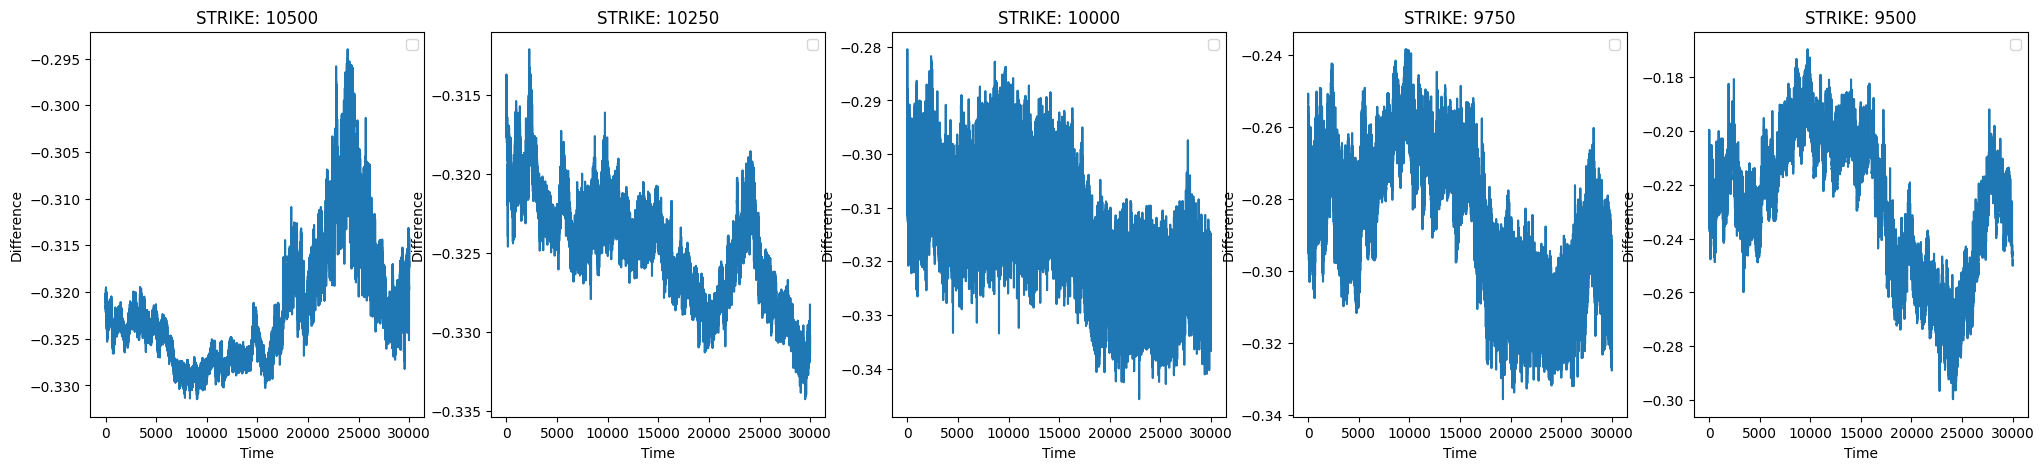

In [26]:
voucher = vouchers[4]
plt.figure(figsize=(25, 5))
i = 1
for voucher in vouchers:
    voucher_df = vouchers_df[vouchers_df['product'] == voucher]
    strike_price = int(voucher.split('_')[-1])

    # voucher_df['value'] = voucher_df.apply(lambda row: black_scholes_call(row['underlying_price'], row['strike_price'], row['time_to_expiry'], row['RV']), axis=1)

    # IV = pd.Series(fix_data(voucher_df['implied_vol'].values))
    # diff = RV - IV

    # diff = voucher_df['value'] - voucher_df['mid_price']

    IV = pd.Series(fix_data(voucher_df['implied_vol'].values))

    difference = IV - hard_coded_rv

    plt.subplot(1, 5, i)
    i += 1
    plt.plot(difference)
    # plt.plot(RV, label='real_vol')
    plt.legend()
    plt.title(f'STRIKE: {strike_price}')
    plt.xlabel('Time')
    plt.ylabel('Difference')

    plt.plot()



In [27]:
print(vouchers_df.columns)

Index(['timestamp', 'product', 'mid_price', 'strike_price', 'time_to_expiry',
       'underlying_price', 'implied_vol', 'Moneyness', 'fitted_iv'],
      dtype='object')


In [30]:
results = []

for ts, group in vouchers_df.groupby('timestamp'):
    # Sort by strike_price within each timestamp group
    sorted_group = group.sort_values(by="strike_price").reset_index(drop=True)
    # Iterate over adjacent pairs within the timestamp
    for i in range(len(sorted_group) - 1):
        lower_row = sorted_group.iloc[i]
        higher_row = sorted_group.iloc[i + 1]
        
        K1 = lower_row['strike_price']
        K2 = higher_row['strike_price']
        C_low = lower_row['mid_price']
        C_high = higher_row['mid_price']
        
        price_diff = C_low - C_high
        strike_diff = K2 - K1
        
        # Check the vertical consistency condition:
        within_bounds = (price_diff >= 0) and (price_diff <= strike_diff)
        
        results.append({
            'timestamp': ts,
            'lower_voucher': lower_row['product'],
            'higher_voucher': higher_row['product'],
            'K1': K1,
            'K2': K2,
            'C(K1)': C_low,
            'C(K2)': C_high,
            'price_diff': price_diff,
            'strike_diff': strike_diff,
            'within_bounds': within_bounds
        })

# Convert the results to a DataFrame for review
consistency_df = pd.DataFrame(results)

# Display all results (or filter to show only mispricings)
print(consistency_df)

# Filter and display cases where the condition was violated
mispricing_df = consistency_df[~consistency_df['within_bounds']]
if not mispricing_df.empty:
    print("\nArbitrage opportunities (violations) detected:")
    print(mispricing_df)
else:
    print("\nNo vertical consistency violations detected.")


        timestamp                lower_voucher               higher_voucher  \
0               0   VOLCANIC_ROCK_VOUCHER_9500   VOLCANIC_ROCK_VOUCHER_9750   
1               0   VOLCANIC_ROCK_VOUCHER_9750  VOLCANIC_ROCK_VOUCHER_10000   
2               0  VOLCANIC_ROCK_VOUCHER_10000  VOLCANIC_ROCK_VOUCHER_10250   
3               0  VOLCANIC_ROCK_VOUCHER_10250  VOLCANIC_ROCK_VOUCHER_10500   
4             100   VOLCANIC_ROCK_VOUCHER_9500   VOLCANIC_ROCK_VOUCHER_9750   
...           ...                          ...                          ...   
119995    2999800  VOLCANIC_ROCK_VOUCHER_10250  VOLCANIC_ROCK_VOUCHER_10500   
119996    2999900   VOLCANIC_ROCK_VOUCHER_9500   VOLCANIC_ROCK_VOUCHER_9750   
119997    2999900   VOLCANIC_ROCK_VOUCHER_9750  VOLCANIC_ROCK_VOUCHER_10000   
119998    2999900  VOLCANIC_ROCK_VOUCHER_10000  VOLCANIC_ROCK_VOUCHER_10250   
119999    2999900  VOLCANIC_ROCK_VOUCHER_10250  VOLCANIC_ROCK_VOUCHER_10500   

           K1     K2   C(K1)  C(K2)  price_diff  st

In [31]:
mispricing_df

,timestamp,lower_voucher,higher_voucher,K1,K2,C(K1),C(K2),price_diff,strike_diff,within_bounds
8320,208000,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,9500,9750,986.5,736.0,250.5,250,False
8560,214000,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,9500,9750,980.5,730.0,250.5,250,False
28920,723000,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,9500,9750,987.5,737.0,250.5,250,False
30104,752600,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,9500,9750,988.0,737.5,250.5,250,False
32368,809200,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,9500,9750,994.0,743.5,250.5,250,False
37820,945500,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,9500,9750,1020.5,770.0,250.5,250,False
38168,954200,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,9500,9750,1027.0,776.5,250.5,250,False
38896,972400,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,9500,9750,1046.0,795.5,250.5,250,False
41556,1038900,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,9500,9750,958.0,707.5,250.5,250,False
46876,1171900,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,9500,9750,980.0,729.5,250.5,250,False


In [32]:
vouchers_df['lower_bound'] = (vouchers_df['underlying_price'] - vouchers_df['strike_price']).clip(lower=0)
vouchers_df['upper_bound'] = vouchers_df['underlying_price']

# Check whether the mid_price lies between these bounds.
# Create a boolean flag for rows that satisfy the no-arbitrage condition.
vouchers_df['no_arb_ok'] = (vouchers_df['mid_price'] >= vouchers_df['lower_bound']) & (vouchers_df['mid_price'] <= vouchers_df['upper_bound'])

# Display rows where the no-arbitrage bounds are violated
violations = vouchers_df[~vouchers_df['no_arb_ok']]

print("Rows that violate the no-arbitrage bounds:")
print(violations[['timestamp', 'product', 'mid_price', 'strike_price', 'underlying_price', 'lower_bound', 'upper_bound']])

Rows that violate the no-arbitrage bounds:
        timestamp                     product  mid_price  strike_price  \
211          4200  VOLCANIC_ROCK_VOUCHER_9500      966.0          9500   
610         12200  VOLCANIC_ROCK_VOUCHER_9500      928.0          9500   
791         15800  VOLCANIC_ROCK_VOUCHER_9500      957.0          9500   
2073        41400  VOLCANIC_ROCK_VOUCHER_9500      935.0          9500   
2101        42000  VOLCANIC_ROCK_VOUCHER_9500      928.5          9500   
...           ...                         ...        ...           ...   
149221    2984400  VOLCANIC_ROCK_VOUCHER_9500      700.5          9500   
149269    2985300  VOLCANIC_ROCK_VOUCHER_9500      700.5          9500   
149639    2992700  VOLCANIC_ROCK_VOUCHER_9500      677.0          9500   
149825    2996500  VOLCANIC_ROCK_VOUCHER_9500      676.5          9500   
149887    2997700  VOLCANIC_ROCK_VOUCHER_9500      670.5          9500   

        underlying_price  lower_bound  upper_bound  
211            

In [34]:
import matplotlib.pyplot as plt

# Assuming vouchers_df is your DataFrame containing columns:
# 'timestamp', 'product', 'mid_price', 'strike_price', 'underlying_price'

# (Optional) If you want to focus on one product, e.g., the 9500 voucher:
# voucher_product = "VOLCANIC_ROCK_VOUCHER_9500"
def check(voucher_product):
    df_voucher = vouchers_df[vouchers_df['product'] == voucher_product].copy()

    # Compute the synthetic underlying cost and arbitrage profit:
    df_voucher['synthetic_cost'] = df_voucher['mid_price'] + df_voucher['strike_price']
    df_voucher['arb_profit'] = df_voucher['underlying_price'] - df_voucher['synthetic_cost']

    # Display a few rows to inspect the calculated values
    print(df_voucher[['timestamp', 'product', 'mid_price', 'strike_price', 
                    'underlying_price', 'synthetic_cost', 'arb_profit']].head())

    # Filter the DataFrame to only those rows where there is a potential arbitrage opportunity (arb_profit > 0)
    arb_opps = df_voucher[df_voucher['arb_profit'] > 0]

    print("Rows with potential arbitrage opportunities:")
    print(arb_opps[['timestamp', 'product', 'mid_price', 'strike_price', 
                    'underlying_price', 'synthetic_cost', 'arb_profit']])

    # ---------------------
    # Visualization 1: Scatter plot of arbitrage profit over time

    plt.figure(figsize=(10,5))
    plt.scatter(arb_opps['timestamp'], arb_opps['arb_profit'], c='blue', alpha=0.6)
    plt.xlabel('Timestamp')
    plt.ylabel('Arbitrage Profit (SeaShells)')
    plt.title('Arbitrage Profit Over Time for ' + voucher_product)
    plt.grid(True)
    plt.show()

    # ---------------------
    # Visualization 2: Histogram of arbitrage profit values

    plt.figure(figsize=(8,4))
    plt.hist(arb_opps['arb_profit'], bins=30, color='green', alpha=0.7)
    plt.xlabel('Arbitrage Profit (SeaShells)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Arbitrage Profit for ' + voucher_product)
    plt.grid(True)
    plt.show()


In [37]:
voucher_df = pd.read_csv('voucher_df_with_implied_vol.csv')
voucher_df["product"].unique()

array(['VOLCANIC_ROCK_VOUCHER_10500', 'VOLCANIC_ROCK_VOUCHER_10000',
       'VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_9500',
       'VOLCANIC_ROCK_VOUCHER_10250'], dtype=object)

    timestamp                      product  mid_price  strike_price  \
0           0  VOLCANIC_ROCK_VOUCHER_10500       99.5         10500   
7         100  VOLCANIC_ROCK_VOUCHER_10500      102.5         10500   
13        200  VOLCANIC_ROCK_VOUCHER_10500      104.5         10500   
17        300  VOLCANIC_ROCK_VOUCHER_10500      106.5         10500   
22        400  VOLCANIC_ROCK_VOUCHER_10500      102.5         10500   

    underlying_price  synthetic_cost  arb_profit  
0            10503.0         10599.5       -96.5  
7            10510.0         10602.5       -92.5  
13           10513.0         10604.5       -91.5  
17           10517.5         10606.5       -89.0  
22           10509.5         10602.5       -93.0  
Rows with potential arbitrage opportunities:
Empty DataFrame
Columns: [timestamp, product, mid_price, strike_price, underlying_price, synthetic_cost, arb_profit]
Index: []


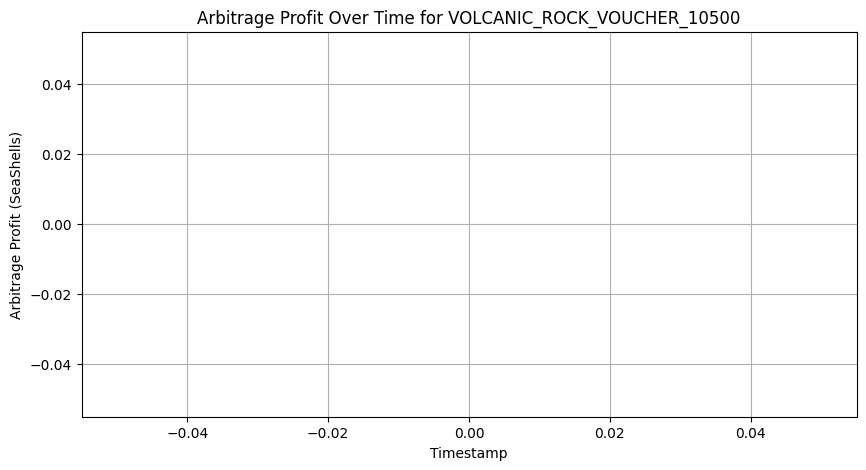

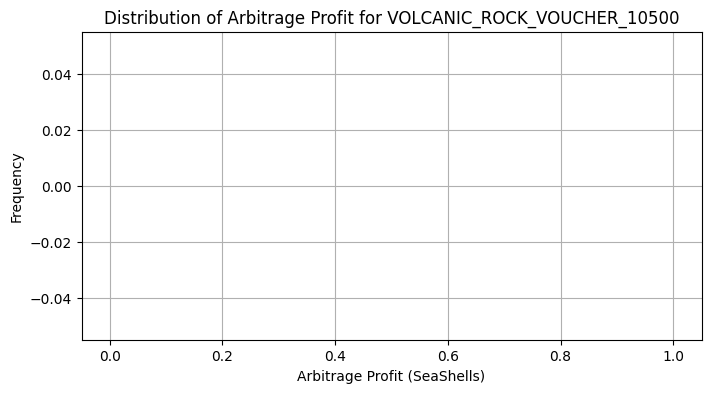

    timestamp                      product  mid_price  strike_price  \
1           0  VOLCANIC_ROCK_VOUCHER_10000      505.5         10000   
5         100  VOLCANIC_ROCK_VOUCHER_10000      515.5         10000   
14        200  VOLCANIC_ROCK_VOUCHER_10000      516.5         10000   
15        300  VOLCANIC_ROCK_VOUCHER_10000      521.5         10000   
23        400  VOLCANIC_ROCK_VOUCHER_10000      512.5         10000   

    underlying_price  synthetic_cost  arb_profit  
1            10503.0         10505.5        -2.5  
5            10510.0         10515.5        -5.5  
14           10513.0         10516.5        -3.5  
15           10517.5         10521.5        -4.0  
23           10509.5         10512.5        -3.0  
Rows with potential arbitrage opportunities:
Empty DataFrame
Columns: [timestamp, product, mid_price, strike_price, underlying_price, synthetic_cost, arb_profit]
Index: []


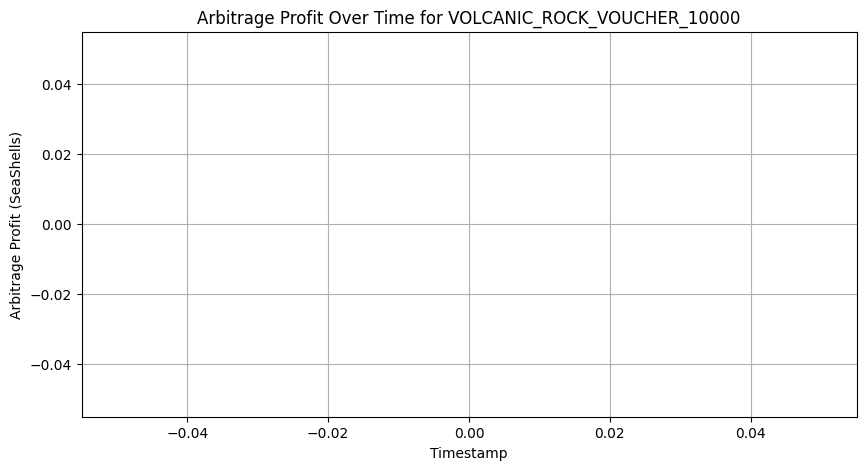

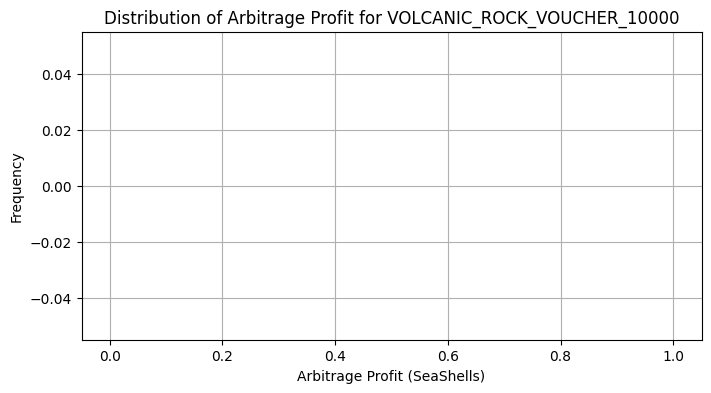

    timestamp                     product  mid_price  strike_price  \
2           0  VOLCANIC_ROCK_VOUCHER_9750      754.5          9750   
8         100  VOLCANIC_ROCK_VOUCHER_9750      761.5          9750   
10        200  VOLCANIC_ROCK_VOUCHER_9750      764.5          9750   
18        300  VOLCANIC_ROCK_VOUCHER_9750      768.5          9750   
24        400  VOLCANIC_ROCK_VOUCHER_9750      760.5          9750   

    underlying_price  synthetic_cost  arb_profit  
2            10503.0         10504.5        -1.5  
8            10510.0         10511.5        -1.5  
10           10513.0         10514.5        -1.5  
18           10517.5         10518.5        -1.0  
24           10509.5         10510.5        -1.0  
Rows with potential arbitrage opportunities:
        timestamp                     product  mid_price  strike_price  \
9434       188600  VOLCANIC_ROCK_VOUCHER_9750      729.0          9750   
10528      210500  VOLCANIC_ROCK_VOUCHER_9750      740.0          9750   
22059 

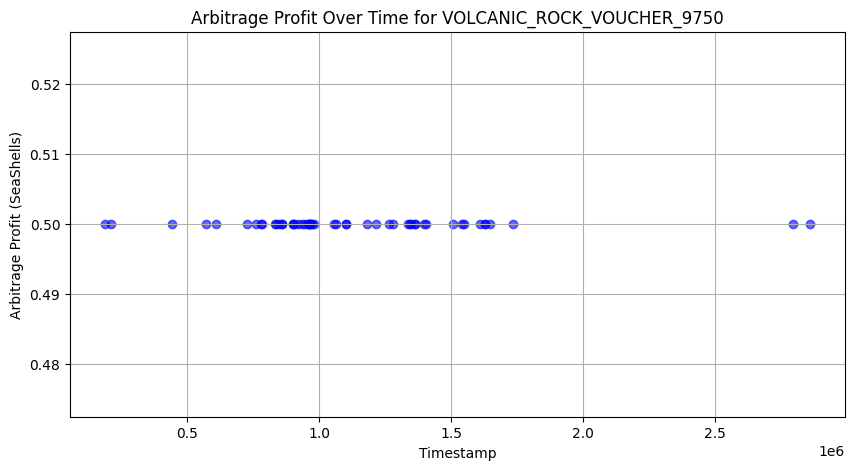

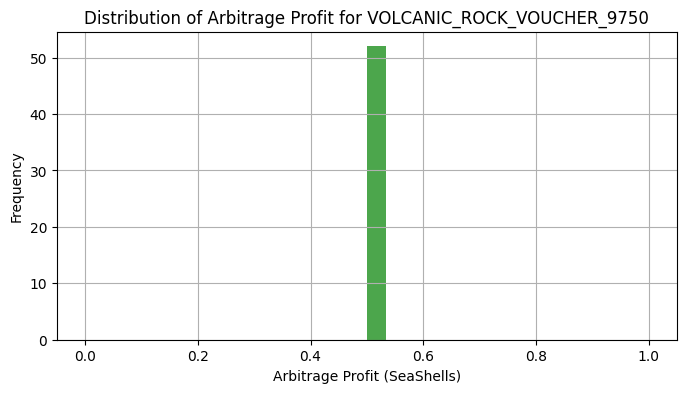

    timestamp                     product  mid_price  strike_price  \
3           0  VOLCANIC_ROCK_VOUCHER_9500     1003.5          9500   
9         100  VOLCANIC_ROCK_VOUCHER_9500     1010.5          9500   
11        200  VOLCANIC_ROCK_VOUCHER_9500     1013.5          9500   
19        300  VOLCANIC_ROCK_VOUCHER_9500     1018.0          9500   
20        400  VOLCANIC_ROCK_VOUCHER_9500     1010.0          9500   

    underlying_price  synthetic_cost  arb_profit  
3            10503.0         10503.5        -0.5  
9            10510.0         10510.5        -0.5  
11           10513.0         10513.5        -0.5  
19           10517.5         10518.0        -0.5  
20           10509.5         10510.0        -0.5  
Rows with potential arbitrage opportunities:
        timestamp                     product  mid_price  strike_price  \
211          4200  VOLCANIC_ROCK_VOUCHER_9500      966.0          9500   
610         12200  VOLCANIC_ROCK_VOUCHER_9500      928.0          9500   
791   

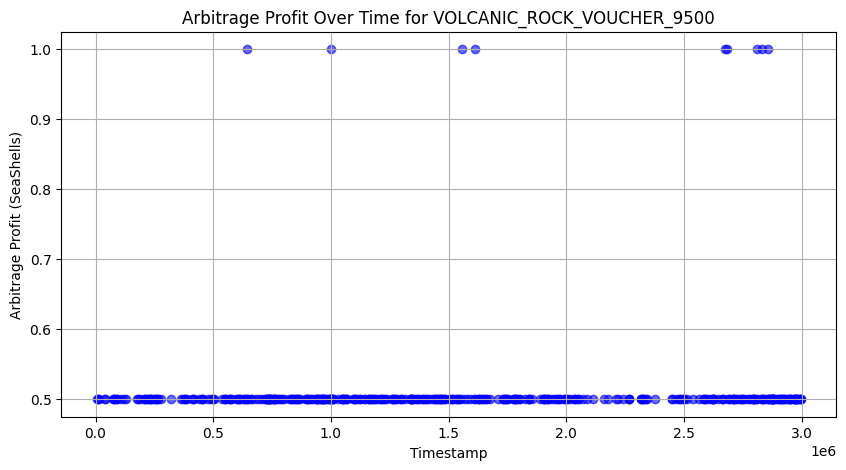

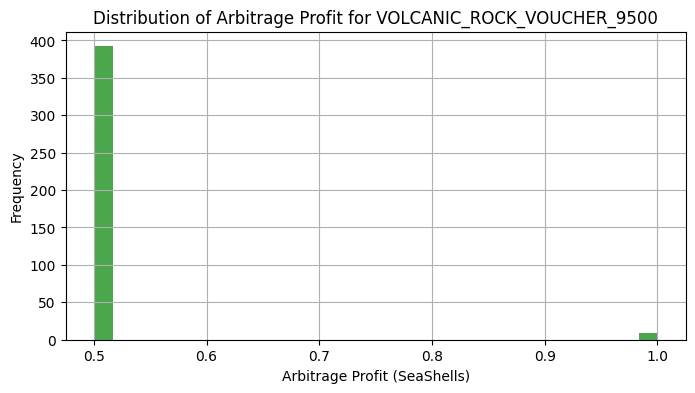

    timestamp                      product  mid_price  strike_price  \
4           0  VOLCANIC_ROCK_VOUCHER_10250      273.5         10250   
6         100  VOLCANIC_ROCK_VOUCHER_10250      279.5         10250   
12        200  VOLCANIC_ROCK_VOUCHER_10250      282.5         10250   
16        300  VOLCANIC_ROCK_VOUCHER_10250      285.5         10250   
21        400  VOLCANIC_ROCK_VOUCHER_10250      279.5         10250   

    underlying_price  synthetic_cost  arb_profit  
4            10503.0         10523.5       -20.5  
6            10510.0         10529.5       -19.5  
12           10513.0         10532.5       -19.5  
16           10517.5         10535.5       -18.0  
21           10509.5         10529.5       -20.0  
Rows with potential arbitrage opportunities:
Empty DataFrame
Columns: [timestamp, product, mid_price, strike_price, underlying_price, synthetic_cost, arb_profit]
Index: []


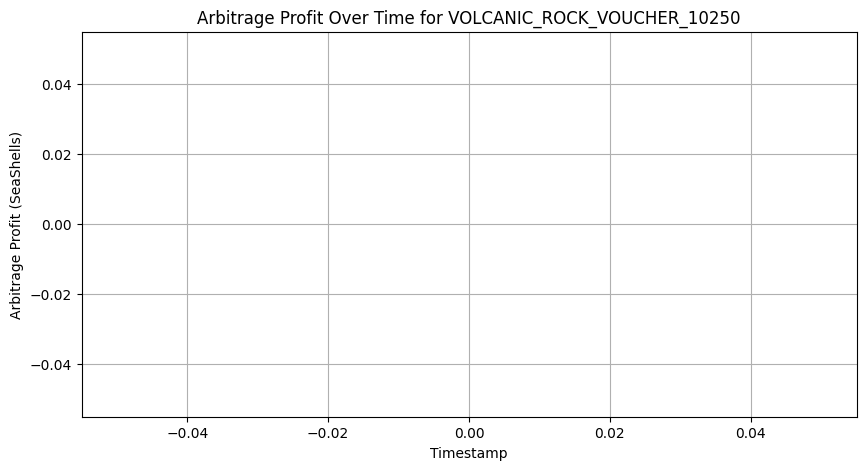

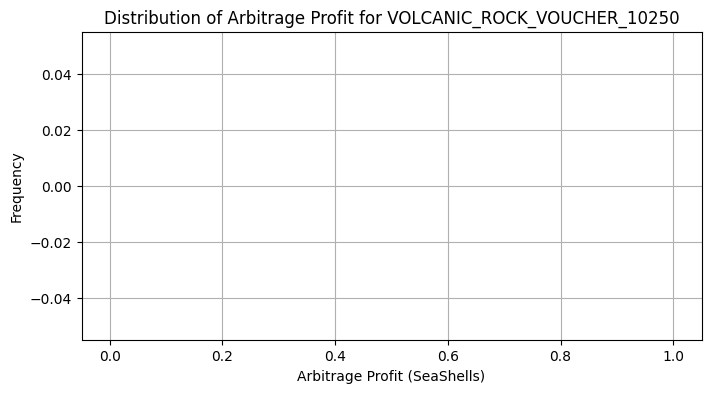

In [38]:
for product in voucher_df["product"].unique():
    check(product)

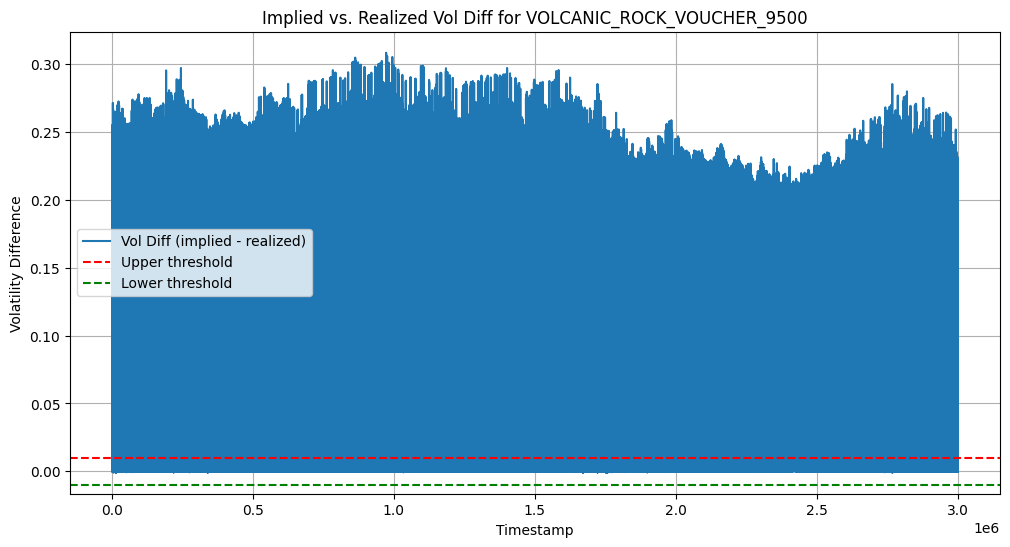

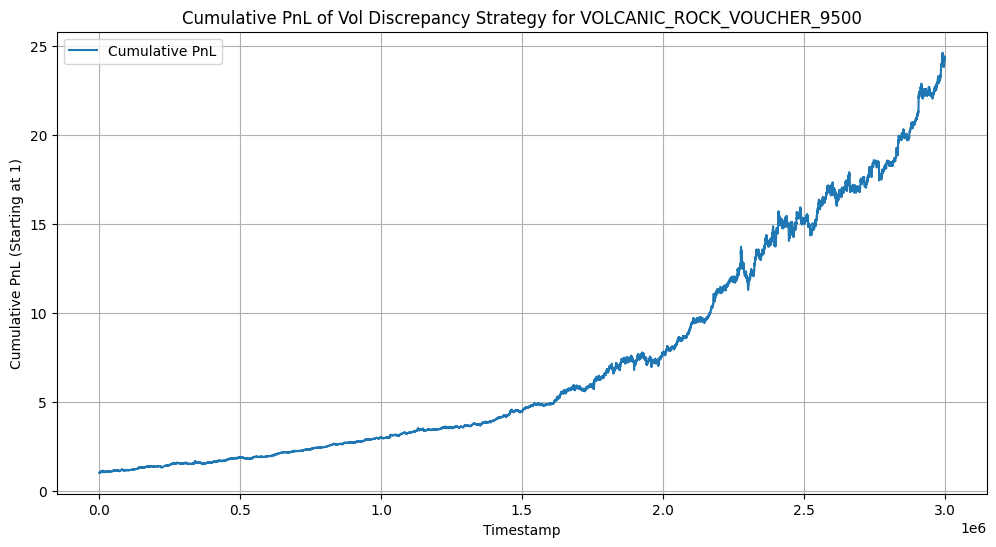

Strategy Performance Summary:
       timestamp  mid_price   implied_vol  realized_vol  vol_diff  signal  \
29990    2999000      667.5  1.000000e-10      0.000237 -0.000237       0   
29991    2999100      665.5  1.000000e-10      0.000237 -0.000237       0   
29992    2999200      664.5  2.292447e-01      0.000236  0.229009      -1   
29993    2999300      660.5  2.280672e-01      0.000245  0.227822      -1   
29994    2999400      666.5  1.000000e-10      0.000291 -0.000291       0   
29995    2999500      668.0  1.000000e-10      0.000291 -0.000291       0   
29996    2999600      667.5  2.301380e-01      0.000275  0.229863      -1   
29997    2999700      667.5  2.301403e-01      0.000259  0.229882      -1   
29998    2999800      667.5  1.000000e-10      0.000254 -0.000254       0   
29999    2999900      666.5  1.000000e-10      0.000255 -0.000255       0   

       voucher_return  strategy_return  cumulative_pnl  
29990        0.000000         0.000000       24.259129  
29991   

In [39]:
# === STEP 0: Assume vouchers_df is already loaded with columns:
# 'timestamp', 'product', 'mid_price', 'strike_price', 
# 'underlying_price', 'implied_vol', 'fitted_iv', 'time_to_expiry', etc.

# For computing realized volatility, we first extract a unique underlying price series.
# We assume that for a given timestamp, the underlying price is the same across products.
underlying_df = vouchers_df[['timestamp', 'underlying_price']].drop_duplicates().sort_values(by='timestamp')
underlying_df.set_index('timestamp', inplace=True)
underlying_df = underlying_df.astype(float)

# Compute log returns of the underlying price
underlying_df['log_return'] = np.log(underlying_df['underlying_price']).diff()

# Compute rolling realized volatility. 
# For instance, a 20-period (could be 20 days) rolling standard deviation.
# If timestamps represent days, you might annualize by multiplying with sqrt(252), but here we keep it in daily vol.
window = 20
underlying_df['realized_vol'] = underlying_df['log_return'].rolling(window=window).std()

# === STEP 1: Merge realized vol back into the voucher data for a selected voucher product.
# Let’s focus on the 9500 voucher
voucher_product = "VOLCANIC_ROCK_VOUCHER_9500"
df_voucher = vouchers_df[vouchers_df['product'] == voucher_product].copy()
df_voucher = df_voucher.sort_values(by='timestamp')

# Merge the realized volatility from the underlying_df into this voucher dataframe.
# Use a left merge on timestamp (convert index to a column if needed)
underlying_df_reset = underlying_df.reset_index()
df_voucher = pd.merge(df_voucher, underlying_df_reset[['timestamp', 'realized_vol']], on='timestamp', how='left')

# === STEP 2: Generate a volatility discrepancy signal.
# We'll use the implied_vol field (or fitted_iv) from your data; here we use implied_vol.
# Calculate the difference between implied and realized volatility.
df_voucher['vol_diff'] = df_voucher['implied_vol'] - df_voucher['realized_vol']

# Define a threshold for taking a position.
# The threshold can be set based on historical distribution; here we'll use an example value (e.g. 0.005 or 0.01).
threshold = 0.01

# Create a trading signal:
# Signal: +1 means long (voucher undervalued relative to realized vol),
#         -1 means short (voucher overvalued),
#          0 means no trade.
def signal_generator(vol_diff, thresh):
    if vol_diff > thresh:
        return -1   # implied >> realized, so overpricing: signal to short
    elif vol_diff < -thresh:
        return 1    # implied << realized, so underpricing: signal to long
    else:
        return 0
        
df_voucher['signal'] = df_voucher['vol_diff'].apply(lambda x: signal_generator(x, threshold))

# === STEP 3: Test the strategy with a simple simulation.
# We simulate daily returns on the voucher (using mid_price changes) as the pnl of being long or short.
# Compute daily return of the voucher mid_price.
df_voucher['voucher_return'] = df_voucher['mid_price'].pct_change()

# For simplicity, assume we take the signal at the beginning of each period and hold for one period.
# Then, daily strategy return = signal_{t-1} * voucher_return_{t}.
df_voucher['strategy_return'] = df_voucher['signal'].shift(1) * df_voucher['voucher_return']

# Compute cumulative PnL (assuming starting capital of 1 unit).
df_voucher['cumulative_pnl'] = (1 + df_voucher['strategy_return'].fillna(0)).cumprod()

# === STEP 4: Visualize the results.
plt.figure(figsize=(12,6))
plt.plot(df_voucher['timestamp'], df_voucher['vol_diff'], label='Vol Diff (implied - realized)')
plt.axhline(y=threshold, color='red', linestyle='--', label='Upper threshold')
plt.axhline(y=-threshold, color='green', linestyle='--', label='Lower threshold')
plt.xlabel('Timestamp')
plt.ylabel('Volatility Difference')
plt.title('Implied vs. Realized Vol Diff for ' + voucher_product)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df_voucher['timestamp'], df_voucher['cumulative_pnl'], label='Cumulative PnL')
plt.xlabel('Timestamp')
plt.ylabel('Cumulative PnL (Starting at 1)')
plt.title('Cumulative PnL of Vol Discrepancy Strategy for ' + voucher_product)
plt.legend()
plt.grid(True)
plt.show()

# Also, display summary statistics of the strategy performance:
print("Strategy Performance Summary:")
print(df_voucher[['timestamp', 'mid_price', 'implied_vol', 'realized_vol', 'vol_diff', 'signal', 
                   'voucher_return', 'strategy_return', 'cumulative_pnl']].tail(10))


In [41]:
voucher_df = pd.read_csv('voucher_df_with_implied_vol.csv')

In [42]:
voucher_df.columns

Index(['timestamp', 'product', 'mid_price', 'strike_price', 'time_to_expiry',
       'underlying_price', 'implied_vol'],
      dtype='object')

In [40]:
# ===== STEP 0: Data Preparation =====
# Assume vouchers_df is your DataFrame that contains:
# 'timestamp', 'product', 'mid_price', 'strike_price', 'underlying_price', 'implied_vol', etc.
# Also assume that you already computed a 'realized_vol' column for the underlying price
# (e.g. using a 20-period rolling standard deviation of log returns).

# For the purpose of illustration, let’s use the 9500 voucher.
voucher_product = "VOLCANIC_ROCK_VOUCHER_9500"
df_voucher = vouchers_df[vouchers_df['product'] == voucher_product].copy()
df_voucher = df_voucher.sort_values(by='timestamp')

# ===== STEP 1: Examine the Volatility Differential =====
# Compute the volatility differential (vol_diff):
df_voucher['vol_diff'] = df_voucher['implied_vol'] - df_voucher['realized_vol']

# Display basic descriptive statistics to see if the differential is biased
vol_diff_stats = df_voucher['vol_diff'].describe()
print("Descriptive Statistics for Vol Diff (implied - realized):")
print(vol_diff_stats)

# ===== STEP 2: Visualize the Differential Over Time =====
plt.figure(figsize=(12,6))
plt.plot(df_voucher['timestamp'], df_voucher['vol_diff'], label='Vol Diff (implied - realized)')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Vol Diff')
plt.title('Time Series of Volatility Differential for ' + voucher_product)
plt.legend()
plt.grid(True)
plt.show()

# ===== STEP 3: Histogram of the Vol Differential =====
plt.figure(figsize=(8,4))
plt.hist(df_voucher['vol_diff'].dropna(), bins=30, alpha=0.7, color='purple')
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('Vol Diff (implied - realized)')
plt.ylabel('Frequency')
plt.title('Distribution of Volatility Differential for ' + voucher_product)
plt.grid(True)
plt.show()

# ===== STEP 4: Identify Extreme Events =====
# You might also look at quantiles to see if there are statistically significant extremes.
quantiles = df_voucher['vol_diff'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
print("Quantiles for Vol Diff:")
print(quantiles)


KeyError: 'realized_vol'